In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [5]:
plt.rcParams['figure.figsize'] = (15, 8)

In [7]:
base_db = pd.read_csv("use_db_sabato14.csv")

# Repeated experiments

**Considering only the top case duration experiments**

In [8]:
base_db.obs_duration_mean.value_counts()

96.0     22305
24.0     11322
48.0      9349
72.0      2799
6.0        892
         ...  
27.5         1
167.5        1
58.5         1
70.8         1
298.0        1
Name: obs_duration_mean, Length: 262, dtype: int64

In [9]:
base_db = base_db[base_db.obs_duration_mean.isin([96, 24, 48, 72])]
base_db.index.size

45775

In [24]:
c_exp = base_db.groupby(["test_cas", "species", "obs_duration_mean", "conc1_type", "exposure_type"])\
                .agg(Median=('conc1_mean', 'median'), Count=('conc1_mean', 'count'), Std=('conc1_mean', "std"))
c_exp = c_exp[c_exp.Count>1]
c_exp

Median  \
test_cas species     obs_duration_mean conc1_type exposure_type            
100-01-6 promelas    96.0              A          F              125.000   
                                                  S              103.950   
100-02-7 macrochirus 96.0              A          S                8.300   
         mykiss      96.0              A          S                5.945   
         promelas    96.0              A          F               41.000   
...                                                                  ...   
99-65-0  promelas    96.0              A          S               15.900   
99-97-8  promelas    96.0              A          F               49.000   
999-61-1 promelas    96.0              A          F                3.355   
999-81-5 macrochirus 96.0              A          S              550.000   
         mykiss      96.0              A          S              550.000   

                                                                 Count  \
test_cas species     obs_duration_mean conc1_type exposure_type          
100-01-6 promelas    96.0              A          F                  2   
                                                  S                  2   
100-02-7 macrochirus 96.0              A          S                  3   
         mykiss      96.0              A          S                  6   
         promelas    96.0              A          F                  9   
...                                                                ...   
99-65-0  promelas    96.0              A          S                  3   
99-97-8  promelas    96.0              A          F                  2   
999-61-1 promelas    96.0              A          F                  4   
999-81-5 macrochirus 96.0              A          S                  2   
         mykiss      96.0              A          S                  2   

                                                                        Std  
test_cas species     obs_duration_mean conc1_type exposure_type              
100-01-6 promelas    96.0              A          F                0.000000  
                                                  S                3.040559  
100-02-7 macrochirus 96.0              A          S                8.443341  
         mykiss      96.0              A          S               29.692050  
         promelas    96.0              A          F               12.575671  
...                                                                     ...  
99-65-0  promelas    96.0              A          S                5.416949  
99-97-8  promelas    96.0              A          F                4.242641  
999-61-1 promelas    96.0              A          F                0.294449  
999-81-5 macrochirus 96.0              A          S              636.396103  
         mykiss      96.0              A          S              636.396103  

[7236 rows x 3 columns]

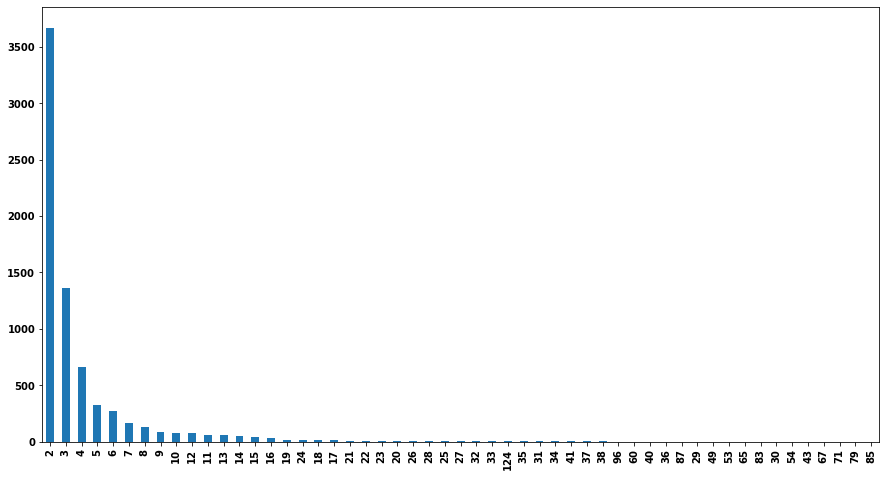

In [60]:
c_exp.Count.value_counts().plot(kind="bar")

In [95]:
c_exp[c_exp.Count==4]

Median  \
test_cas   species    obs_duration_mean conc1_type exposure_type             
100-42-5   promelas   24.0              F          S                44.365   
                      48.0              F          S                42.790   
                      96.0              F          S                39.205   
100-52-7   promelas   96.0              A          F                12.600   
10025-91-9 promelas   96.0              T          S                14.400   
...                                                                    ...   
94-75-7    vittatus   96.0              A          S              1420.000   
95-51-2    promelas   96.0              A          F                 5.665   
95-76-1    reticulata 48.0              A          AQUA              4.500   
                      96.0              A          AQUA              6.850   
999-61-1   promelas   96.0              A          F                 3.355   

                                                                  Count  \
test_cas   species    obs_duration_mean conc1_type exposure_type          
100-42-5   promelas   24.0              F          S                  4   
                      48.0              F          S                  4   
                      96.0              F          S                  4   
100-52-7   promelas   96.0              A          F                  4   
10025-91-9 promelas   96.0              T          S                  4   
...                                                                 ...   
94-75-7    vittatus   96.0              A          S                  4   
95-51-2    promelas   96.0              A          F                  4   
95-76-1    reticulata 48.0              A          AQUA               4   
                      96.0              A          AQUA               4   
999-61-1   promelas   96.0              A          F                  4   

                                                                         Std  
test_cas   species    obs_duration_mean conc1_type exposure_type              
100-42-5   promelas   24.0              F          S               16.814637  
                      48.0              F          S               16.473306  
                      96.0              F          S               13.991927  
100-52-7   promelas   96.0              A          F                4.670584  
10025-91-9 promelas   96.0              T          S                3.364521  
...                                                                      ...  
94-75-7    vittatus   96.0              A          S              181.773669  
95-51-2    promelas   96.0              A          F                0.299819  
95-76-1    reticulata 48.0              A          AQUA             3.539156  
                      96.0              A          AQUA             2.728247  
999-61-1   promelas   96.0              A          F                0.294449  

[661 rows x 3 columns]

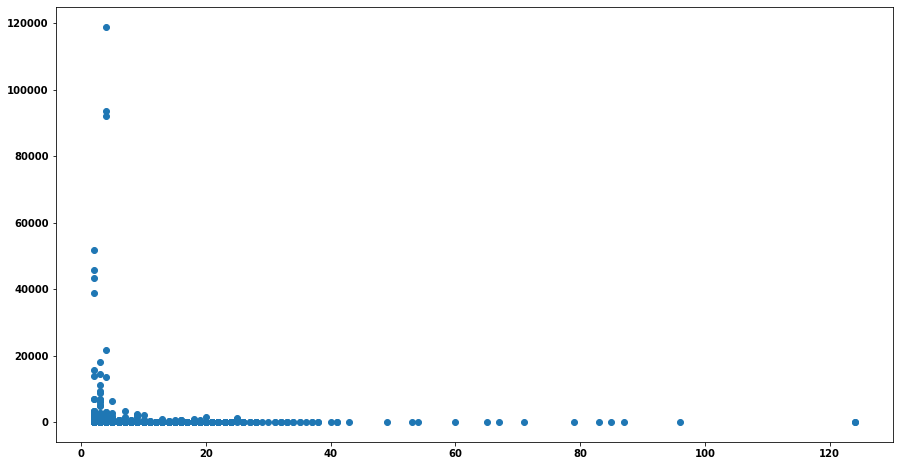

In [83]:
plt.scatter(x=c_exp.Count, y=c_exp.Std)
#plt.xlim(1.5, 10.5)
#plt.ylim(-10,1000)

(-10, 1000)

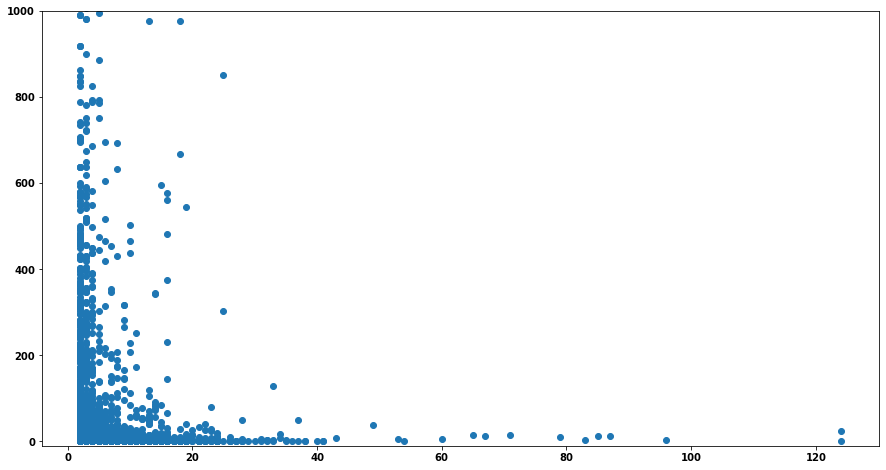

In [80]:
plt.scatter(x=c_exp.Count, y=c_exp.Std)
#plt.xlim(1.5, 10.5)
plt.ylim(-10,1000)

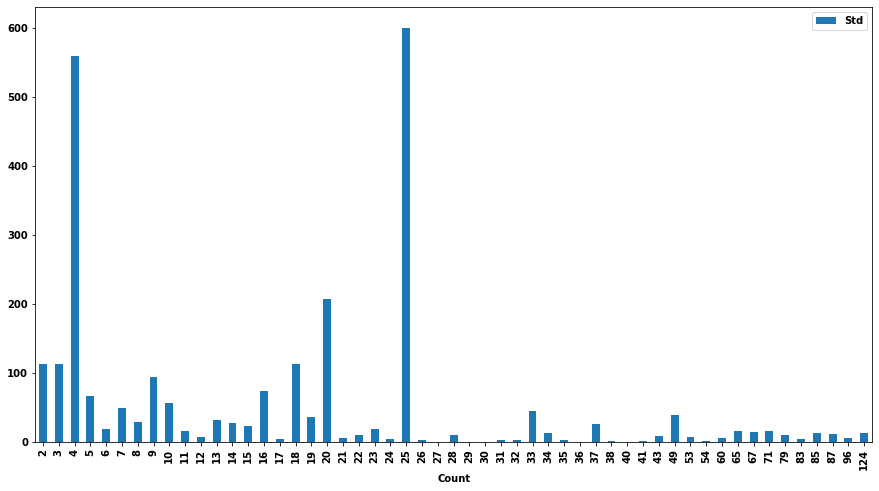

In [91]:
c_exp.groupby("Count").agg(Std=("Std","mean")).plot(kind="bar")

In [52]:
count_good = base_db.copy()
count_good["killed"] =  np.where(count_good['conc1_mean']>=1, 1, 0)
count_good = count_good.groupby(["test_cas", "species", "obs_duration_mean", "conc1_type", "exposure_type"])\
                .agg(Median=('conc1_mean', 'median'), Count=('conc1_mean', 'count'), Std=('conc1_mean', "std"), tot_kill=('killed', 'sum'))
#count_good = count_good[count_good.Count>1]
count_good['acc'] = count_good.tot_kill/count_good.Count
bad_exp = count_good[(count_good.acc<1) & (count_good.acc!=0)]

In [53]:
bad_exp

Median  \
test_cas   species      obs_duration_mean conc1_type exposure_type           
10099-74-8 arcticus     96.0              T          S               6.850   
           carpio       96.0              D          S               1.405   
                                          T          R               0.620   
           catla        96.0              D          S               1.115   
           mykiss       96.0              D          S               1.380   
...                                                                    ...   
96300-97-9 mykiss       96.0              A          S               1.500   
                                          F          S               2.700   
97-17-6    heteromorpha 24.0              F          R               1.525   
99-30-9    mykiss       96.0              A          S               1.080   
99-35-4    promelas     96.0              A          S               0.795   

                                                                    Count  \
test_cas   species      obs_duration_mean conc1_type exposure_type          
10099-74-8 arcticus     96.0              T          S                  6   
           carpio       96.0              D          S                 14   
                                          T          R                  4   
           catla        96.0              D          S                 14   
           mykiss       96.0              D          S                  7   
...                                                                   ...   
96300-97-9 mykiss       96.0              A          S                  9   
                                          F          S                  2   
97-17-6    heteromorpha 24.0              F          R                  2   
99-30-9    mykiss       96.0              A          S                  2   
99-35-4    promelas     96.0              A          S                  2   

                                                                          Std  \
test_cas   species      obs_duration_mean conc1_type exposure_type              
10099-74-8 arcticus     96.0              T          S              17.192512   
           carpio       96.0              D          S               0.798423   
                                          T          R               0.467126   
           catla        96.0              D          S               0.575500   
           mykiss       96.0              D          S               0.417481   
...                                                                       ...   
96300-97-9 mykiss       96.0              A          S               0.766975   
                                          F          S               2.545584   
97-17-6    heteromorpha 24.0              F          R               0.813173   
99-30-9    mykiss       96.0              A          S               0.735391   
99-35-4    promelas     96.0              A          S               0.431335   

                                                                    tot_kill  \
test_cas   species      obs_duration_mean conc1_type exposure_type             
10099-74-8 arcticus     96.0              T          S                     5   
           carpio       96.0              D          S                    10   
                                          T          R                     1   
           catla        96.0              D          S                     9   
           mykiss       96.0              D          S                     6   
...                                                                      ...   
96300-97-9 mykiss       96.0              A          S                     6   
                                          F          S                     1   
97-17-6    heteromorpha 24.0              F          R                     1   
99-30-9    mykiss       96.0              A          S                     1   
99-35-4    promelas     96.0         

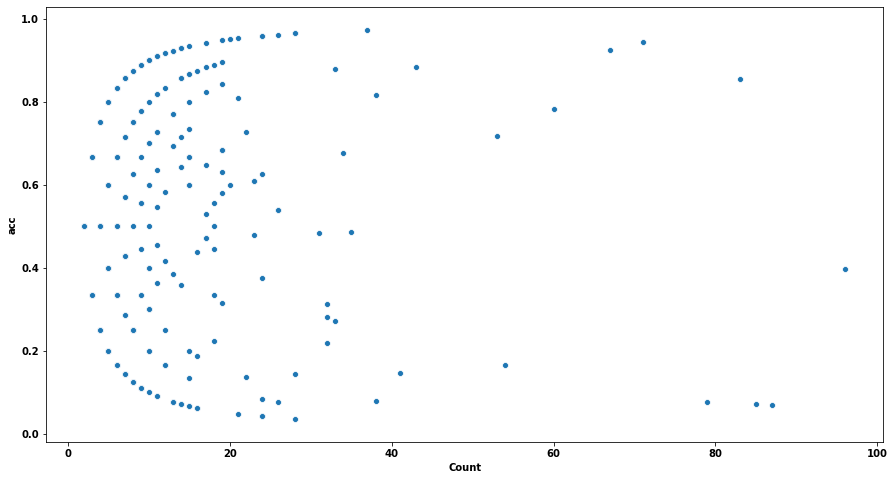

In [50]:
import seaborn as sns
sns.scatterplot(x=bad_exp.Count, y=bad_exp.acc)

In [54]:
bad_exp.acc.mean()

0.5181849810417137

In [55]:
count_good.acc.mean()

0.6351219976061239

In [28]:
grouped_std = base_db.groupby(["obs_duration_mean", "test_cas", "species"]).std().dropna().reset_index()

In [53]:
grouped_96h = grouped_std[grouped_std.obs_duration_mean==96]
grouped_96h.conc1_mean.sort_values(ascending=False)

6831    353482.679915
5093     53103.719267
4358     27734.305472
5017     21791.676801
4513     15563.420254
            ...      
7777         0.000000
4860         0.000000
6923         0.000000
5270         0.000000
5816         0.000000
Name: conc1_mean, Length: 3638, dtype: float64

In [36]:
grouped_std.loc[6831]

obs_duration_mean             96
test_cas                 8012951
species              macrochirus
conc1_mean                353483
Name: 6831, dtype: object

In [38]:
base_db[(base_db.obs_duration_mean==96) & (base_db.test_cas==8012951) & (base_db.species=="macrochirus")]

test_cas exposure_type  obs_duration_mean conc1_type  conc1_mean  \
21857   8012951             S               96.0          A    500000.0   
52635   8012951             S               96.0          A       100.0   

                class    tax_order         family    genus      species  \
21857  Actinopterygii  Perciformes  Centrarchidae  Lepomis  macrochirus   
52635  Actinopterygii  Perciformes  Centrarchidae  Lepomis  macrochirus   

      organism_lifestage organism_characteristics                ecotox_group  
21857                 NC                   0.34 g  Fish,Standard Test Species  
52635                 NC                   0.46 g  Fish,Standard Test Species

In [ ]:
results_final= pd.read_pickle("data/results_final.pkl")

In [48]:
t = results_final[(results_final.test_cas==8012951) & (results_final.species=="macrochirus")]
t[["conc1_mean", "conc1_unit"]]

conc1_mean conc1_unit
25061     500000        ppm
36634        100        ppm
60143        100        ppm

In [39]:
grouped_std.loc[5093]

obs_duration_mean          96
test_cas               111466
species              promelas
conc1_mean            53103.7
Name: 5093, dtype: object

In [41]:
base_db[(base_db.obs_duration_mean==96) & (base_db.test_cas==111466) & (base_db.species=="promelas")]

test_cas exposure_type  obs_duration_mean conc1_type  conc1_mean  \
18579    111466             S               96.0          F       100.0   
51119    111466             F               96.0          A     75200.0   

                class      tax_order      family       genus   species  \
18579  Actinopterygii  Cypriniformes  Cyprinidae  Pimephales  promelas   
51119  Actinopterygii  Cypriniformes  Cyprinidae  Pimephales  promelas   

      organism_lifestage organism_characteristics                ecotox_group  
18579                 NR                       NR  Fish,Standard Test Species  
51119                 NR         19.1 MM, 0.102 G  Fish,Standard Test Species

In [45]:
t1 = results_final[(results_final.test_cas==111466) & (results_final.species=="promelas")]
t1[["conc1_mean", "conc1_unit"]]

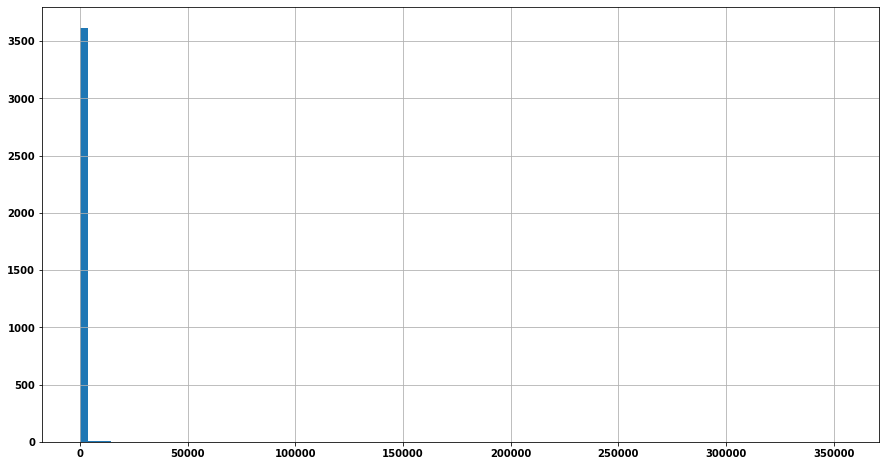

In [54]:
grouped_96h.conc1_mean.hist(bins=100)

In [69]:
grouped_96h.index.size

3638

In [68]:
grouped96h_no_out = grouped_96h[~(grouped_96h.conc1_mean>1000)]
grouped96h_no_out.index.size

3577

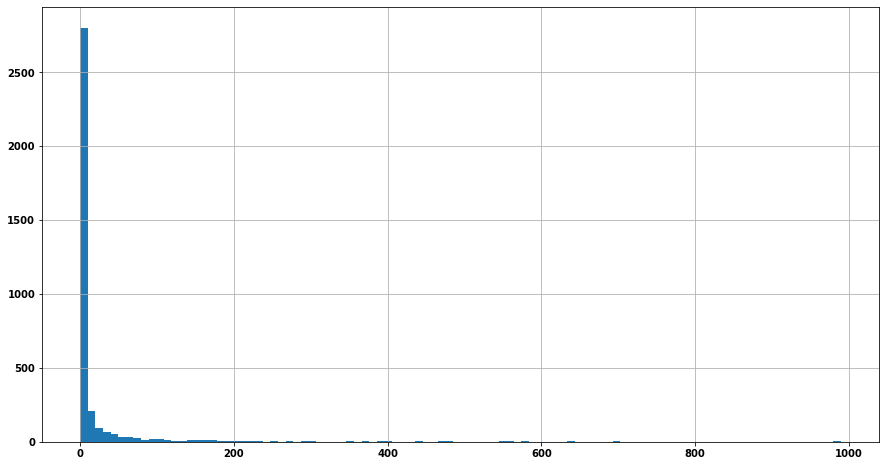

In [66]:
grouped96h_no_out.conc1_mean.hist(bins=100)

In [67]:
grouped96h_no_out[grouped96h_no_out.conc1_mean<10]

obs_duration_mean   test_cas      species  conc1_mean
4227               96.0      50000    carolinus    2.909181
4228               96.0      50000  macrochirus    0.919239
4230               96.0      50000     promelas    1.171893
4231               96.0      50000    punctatus    0.000000
4234               96.0      50282   marmoratus    2.573869
...                 ...        ...          ...         ...
7857               96.0  177256698  tshawytscha    0.000000
7858               96.0  187166401  macrochirus    0.951766
7860               96.0  243973208     promelas    0.000000
7861               96.0  243973208   variegatus    0.000000
7862               96.0  245367775      affinis    0.051316

[2808 rows x 4 columns]

In [70]:
grouped_24h = grouped_std[grouped_std.obs_duration_mean==24]
grouped_24h.conc1_mean.sort_values(ascending=False)

524     118952.849066
518      29965.980711
104      18738.329701
230      18027.756377
220      10487.769067
            ...      
1689         0.000000
867          0.000000
1765         0.000000
1459         0.000000
1193         0.000000
Name: conc1_mean, Length: 1891, dtype: float64

In [71]:
grouped_std.loc[524]

obs_duration_mean             24
test_cas                  108872
species              crysoleucas
conc1_mean                118953
Name: 524, dtype: object

In [72]:
base_db[(base_db.obs_duration_mean==24) & (base_db.test_cas==108872) & (base_db.species=="crysoleucas")]

test_cas exposure_type  obs_duration_mean conc1_type  conc1_mean  \
737      108872             S               24.0          F    238000.0   
3504     108872             S               24.0          F        62.0   
3530     108872             S               24.0          F       180.0   
25760    108872             S               24.0          F        41.0   

                class      tax_order      family        genus      species  \
737    Actinopterygii  Cypriniformes  Cyprinidae  Notemigonus  crysoleucas   
3504   Actinopterygii  Cypriniformes  Cyprinidae  Notemigonus  crysoleucas   
3530   Actinopterygii  Cypriniformes  Cyprinidae  Notemigonus  crysoleucas   
25760  Actinopterygii  Cypriniformes  Cyprinidae  Notemigonus  crysoleucas   

      organism_lifestage organism_characteristics ecotox_group  
737                   NR                       NR         Fish  
3504                  NR                       NR         Fish  
3530                  NR                       NR         Fish  
25760                 NR                       NR         Fish

In [77]:
t2 = results_final[(results_final.obs_duration_mean=="24") & (results_final.test_cas==108872) & (results_final.species=="crysoleucas")]
t2[["conc1_mean", "conc1_unit"]]

conc1_mean conc1_unit
892    238000000*       ug/L
4098       62000*       ug/L
4125      180000*       ug/L
29491      41000*       ug/L

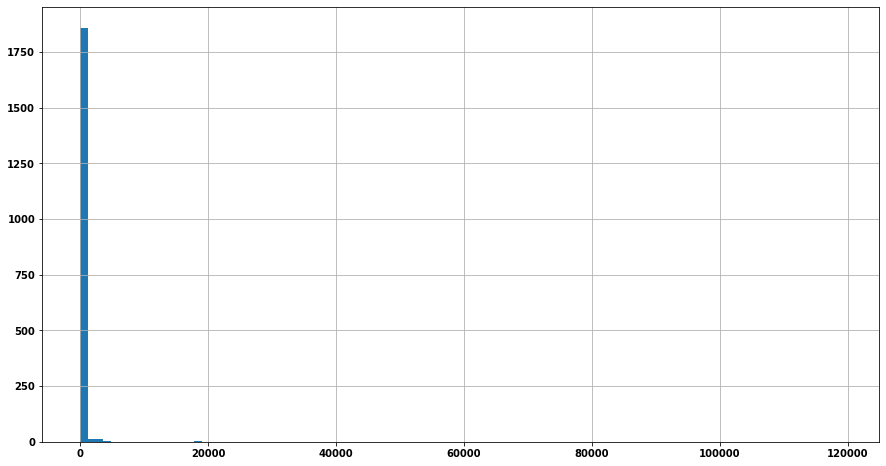

In [78]:
grouped_24h.conc1_mean.hist(bins=100)

In [80]:
grouped_24h.index.size

1891

In [83]:
grouped_24h[~(grouped_24h.conc1_mean>1000)]

obs_duration_mean   test_cas      species  conc1_mean
0                  24.0      50000    carolinus    3.579572
1                  24.0      50000      latipes   27.300794
2                  24.0      50000       mykiss   30.405592
3                  24.0      50000    punctatus   28.867513
4                  24.0      50000    saxatilis   44.353880
...                 ...        ...          ...         ...
1886               24.0   96352691       mykiss    0.000000
1887               24.0  100473083  macrochirus    0.611010
1888               24.0  100473083       mykiss    0.707107
1889               24.0  107534963        rerio   12.586501
1890               24.0  120068373     promelas    0.013308

[1856 rows x 4 columns]